In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from itertools import combinations
import networkx as nx
import community
from utils.cluster import cluster
from utils.recombinations import recombinations
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from pandas.io.formats.style import Styler
from utils.preprocessing import preprocessing
import os

In [2]:

conv = pd.read_csv('../Data/221121_sjogren_exclude_all_healthy_convergent.csv')
subject_id = {
    'PSO': 'S1',
    'YJH': 'S2',
    'WKM': 'S3',
    'KYB': 'S4',
    'HHJ': 'S5',
    'KJH': 'S6',
    'LCR': 'S7',
    'PSB': 'S8',
    'CKJ': 'S9',
    'JHO': 'S10',
    'YYS': 'S11',
    'KJY': 'S12',
    'KMJ': 'S13',
    'LYS': 'S14',
    'CJR': 'S15',
    'HKN': 'S16',
    'PSJ': 'S17',
    'KSK': 'S18',
    'LHS': 'S19',
    'KMO': 'S20'
}
conv['patients'] = conv['patients'].copy().apply(lambda x:  x.split('|'))
conv['patients'] = conv['patients'].apply(lambda x: [subject_id[i] for i in x])
conv

,v_call,j_call,cdr3_aa,patients,degree_of_convergence
0,IGHV4-59,IGHJ2,ARDRYCSGGSCFDWYFDL,"[S4, S1, S5, S7, S2, S3, S6]",7
1,IGHV3-7,IGHJ4,VKDGACGSDCYLN,"[S12, S4, S1, S3, S16, S6]",6
2,IGHV3-66,IGHJ3,PRGDFDI,"[S12, S4, S1, S3, S16, S6]",6
3,IGHV3-7,IGHJ4,ARVKRDGPLDY,"[S12, S4, S1, S3, S16, S6]",6
4,IGHV5-51,IGHJ5,ASSNYNWFDP,"[S15, S1, S20, S13, S8, S6]",6
...,...,...,...,...,...
3953,IGHV3-66,IGHJ4,VGYGGNSN,"[S8, S6]",2
3954,IGHV3-72,IGHJ4,ARVRDGGSQDC,"[S8, S6]",2
3955,IGHV3-21,IGHJ4,ARDEAMGY,"[S8, S6]",2
3956,IGHV3-23,IGHJ3,AKSLGDSEYDAFDV,"[S8, S6]",2


In [3]:
from utils.preprocessing import preprocessing
def unique_shared_clonotype(shared_clonotype):
    raw_datas = []
    for patient in shared_clonotype['patients']:
        df = pd.read_csv(f'../Data/new_sjogren_file/{patient}_add_d_gene.tsv', sep='\t')
        process = preprocessing(df)
        raw_datas.append(process().get_group((shared_clonotype['v_call'], shared_clonotype['j_call'], shared_clonotype['cdr3_aa'])))
    concat = pd.concat(raw_datas, keys = shared_clonotype['patients'])
    concat['isUnique'] = ~concat['sequence'].duplicated(keep=False)
    return concat

In [11]:
datas = []
for i in range(91):
    datas.append(unique_shared_clonotype(conv.iloc[i]))

In [15]:
concat_clone = pd.concat(datas, keys = conv.iloc[0:91]['v_call'] + '|' + conv.iloc[0:91]['j_call'] + '|' + conv.iloc[0:91]['cdr3_aa'])
concat_clone

sequence_id  duplicate_count  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  Seq_168903                1   
                                  S1  12870    Seq_12871                2   
                                  S5  2865      Seq_2866               15   
                                      46582    Seq_46583                2   
                                      106909  Seq_106910                1   
...                                                  ...              ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697    Seq_92698                1   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  Seq_429051                1   
                                  S10 325193  Seq_325194                1   
                                  S19 115392  Seq_115393                1   
                                  S14 104862  Seq_104863                1   

                                              frequency  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902   0.000001   
                                  S1  12870    0.000005   
                                  S5  2865     0.000019   
                                      46582    0.000003   
                                      106909   0.000001   
...                                                 ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697    0.000003   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050   0.000001   
                                  S10 325193   0.000001   
                                  S19 115392   0.000002   
                                  S14 104862   0.000003   

                                                                                       sequence  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...   
                                  S1  12870   CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...   
                                  S5  2865    CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...   
                                      46582   CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...   
                                      106909  CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...   
...                                                                                         ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697   TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S10 325193  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S19 115392  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   
                                  S14 104862  CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...   

                                                                                    sequence_aa  \
IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL S4  168902  TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...   
                                  S1  12870   TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...   
                                  S5  2865    TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...   
                                      46582   TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...   
                                      106909  TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...   
...                                                                                         ...   
IGHV3-48|IGHJ6|ARDCGEGYGMDV       S6  92697   AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...   
IGHV4-34|IGHJ3|RLGGAYGDNYAFDT     S2  429050  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   
                                  S10 325193  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   
                                  S19 115392  VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...   
                                  S14 104862  VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...   

                                 

In [16]:
concat_clone.to_csv('../Data/sjogren_unique_sequences_marked.csv')
concat_clone =  pd.read_csv('../Data/sjogren_unique_sequences_marked.csv')
concat_clone

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,...,cdr2_aa,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique
0,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S4,168902,Seq_168903,1,0.000001,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,...,IHSSGRT,ARDRYCSGGSCFDWYFDL,F,T,16=1X22=1X12=1X13=1X5=1X10=1X3=2X3=1X9=1X29=1X...,7=1X11=1X4=,50=,228,15,True
1,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S1,12870,Seq_12871,2,0.000005,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,...,MYYSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X55=1X5=1X2=1X5=1X2=1X47=1X34=1X9=1X32=1X2=,7=1X16=,34=1X15=,228,10,True
2,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,2865,Seq_2866,15,0.000019,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,...,VHDSGIT,ARDRYCSGGSCFDWYFDL,F,T,14=1X10=1X6=2X14=1X8=1X14=1X10=1X1=1X2=1X2=1X9...,4=1X17=,50=,228,22,True
3,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,46582,Seq_46583,2,0.000003,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,...,IHDSGNT,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X9=1X6=1X23=1...,4=1X8=1X8=,50=,228,21,True
4,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,106909,Seq_106910,1,0.000001,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,...,IHDSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X40=1X11=1X2=...,4=1X8=1X8=,50=,228,19,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,92697,Seq_92698,1,0.000003,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False
7053,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S2,429050,Seq_429051,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True
7054,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S10,325193,Seq_325194,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,False
7055,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S19,115392,Seq_115393,1,0.000002,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True


In [29]:
concat_clone.rename(columns={"Unnamed: 0" : "clonotype", "Unnamed: 1" : "patient_id"}, inplace=True)
concat_clone

,clonotype,patient_id,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,...,cdr2_aa,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique
0,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S4,Seq_168903,1,0.000001,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,IGHV4-59,...,IHSSGRT,ARDRYCSGGSCFDWYFDL,F,T,16=1X22=1X12=1X13=1X5=1X10=1X3=2X3=1X9=1X29=1X...,7=1X11=1X4=,50=,228,15,True
1,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S1,Seq_12871,2,0.000005,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,IGHV4-59,...,MYYSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X55=1X5=1X2=1X5=1X2=1X47=1X34=1X9=1X32=1X2=,7=1X16=,34=1X15=,228,10,True
2,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_2866,15,0.000019,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,IGHV4-59,...,VHDSGIT,ARDRYCSGGSCFDWYFDL,F,T,14=1X10=1X6=2X14=1X8=1X14=1X10=1X1=1X2=1X2=1X9...,4=1X17=,50=,228,22,True
3,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_46583,2,0.000003,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,IHDSGNT,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X9=1X6=1X23=1...,4=1X8=1X8=,50=,228,21,True
4,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_106910,1,0.000001,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,IHDSGST,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X40=1X11=1X2=...,4=1X8=1X8=,50=,228,19,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,Seq_92698,1,0.000003,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,IGHV3-48,...,ISHGSIAI,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False
7053,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S2,Seq_429051,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True
7054,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S10,Seq_325194,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,False
7055,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S19,Seq_115393,1,0.000002,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,VNQSGGV,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True


In [30]:
sequence_group = concat_clone.groupby('sequence')['patient_id'].nunique()
concat_clone['isShared'] = concat_clone['sequence'].map(lambda x: sequence_group[x]>1)

In [4]:
#concat_clone.to_csv('../Data/sjogren_unique_sequences_marked.csv', index=False)
concat_clone =  pd.read_csv('../Data/sjogren_unique_sequences_marked.csv')
concat_clone

,clonotype,patient_id,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,...,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique,isShared
0,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S4,Seq_168903,1,0.000001,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,TVSGGPISSYYWSWIRQSPGKGLEWIGFIHSSGRTNYNPSLKSRVA...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,CACTGTCTCTGGTGGCCCCATCAGTAGTTACTACTGGAGTTGGATC...,IGHV4-59,...,ARDRYCSGGSCFDWYFDL,F,T,16=1X22=1X12=1X13=1X5=1X10=1X3=2X3=1X9=1X29=1X...,7=1X11=1X4=,50=,228,15,True,False
1,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S1,Seq_12871,2,0.000005,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,TVSGGSVSGYYWSWIRQPPGKGLEWIGYMYYSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,CACTGTCTCTGGTGGCTCCGTCAGTGGTTACTACTGGAGCTGGATC...,IGHV4-59,...,ARDRYCSGGSCFDWYFDL,F,T,25=1X55=1X5=1X2=1X5=1X2=1X47=1X34=1X9=1X32=1X2=,7=1X16=,34=1X15=,228,10,True,False
2,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_2866,15,0.000019,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,TVSGASISGYSWSWIRQPPGKGLEWIGFVHDSGITNYNPSLKSRVT...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,CACTGTCTCTGGTGCCTCCATCAGTGGTTACTCTTGGAGCTGGATC...,IGHV4-59,...,ARDRYCSGGSCFDWYFDL,F,T,14=1X10=1X6=2X14=1X8=1X14=1X10=1X1=1X2=1X2=1X9...,4=1X17=,50=,228,22,True,False
3,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_46583,2,0.000003,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGNTNYNPSLKSRVS...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X9=1X6=1X23=1...,4=1X8=1X8=,50=,228,21,True,False
4,IGHV4-59|IGHJ2|ARDRYCSGGSCFDWYFDL,S5,Seq_106910,1,0.000001,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,TVSGGSISGYYWSWIRQPPGKGLEWIGYIHDSGSTNYNPSLKSRVT...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,CACTGTCTCTGGTGGCTCCATCAGTGGTTACTATTGGAGTTGGATC...,IGHV4-59,...,ARDRYCSGGSCFDWYFDL,F,T,25=1X7=1X5=1X8=1X23=1X8=1X6=1X2=1X40=1X11=1X2=...,4=1X8=1X8=,50=,228,19,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7052,IGHV3-48|IGHJ6|ARDCGEGYGMDV,S6,Seq_92698,1,0.000003,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,AASGFTFSTYNLNWVRQAPGKGLEWLSYISHGSIAIYYADSVKGRF...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,TGCAGCCTCTGGATTCACCTTCAGTACTTATAACCTGAACTGGGTC...,IGHV3-48,...,ARDCGEGYGMDV,F,T,26=2X4=1X1=1X41=1X14=2X1=1X6=1X1=1X50=1X55=2X1...,8=,6=1X14=1X23=1X3=,231,15,False,True
7053,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S2,Seq_429051,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True,False
7054,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S10,Seq_325194,1,0.000001,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGEVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,False,True
7055,IGHV4-34|IGHJ3|RLGGAYGDNYAFDT,S19,Seq_115393,1,0.000002,CACAGTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATC...,VEGVSLNGLFCAWIRQSPGQGLEWIGDVNQSGGVNYNTTLRSRITI...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,GTCGAGGGTGTGTCCCTCAATGGTCTCTTCTGCGCCTGGATCCGCC...,IGHV4-34,...,RLGGAYGDNYAFDT,F,T,3=1X1=1X4=1X4=1X3=1X4=2X2=1X3=3X13=1X7=2X4=1X1...,10=,10=1X1=2X15=1X17=,216,44,True,False


In [5]:
clone_marked = pd.read_csv('../Data/sjogren_unique_sequences_marked.csv')
clone1 = clone_marked.groupby('clonotype').get_group(clone_marked['clonotype'].unique()[1])
clone1
# shared['sequence'].value_counts()

,clonotype,patient_id,sequence_id,duplicate_count,frequency,sequence,sequence_aa,sequence_alignment,germline_alignment,v_call,...,cdr3_aa,rev_comp,productive,v_cigar,d_cigar,j_cigar,v_alignment_length,v_alignment_mutation,isUnique,isShared
19,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_16082,3,0.000003,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X18=...,7=1X11=,18=1X9=1X6=,231,18,False,True
20,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_307165,1,0.000001,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFHLSDYWMSWVRQTPGKGLEWVANIKQDGSERNYVDSVKGRF...,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCACTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X12=1X4=1X35=1X13=1X1=1X51=1X...,7=1X11=,18=1X9=1X6=,231,21,False,True
21,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_312844,1,0.000001,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X12=...,7=1X11=,18=1X9=1X6=,231,19,False,True
22,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S12,Seq_326894,1,0.000001,TGCAGCCTCTGGATTCCGGTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVESVKGRF...,TGCAGCCTCTGGATTCCGGTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGGTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=3X2=1X3=3X11=1X44=1X24=1X10=1X18=1X18=1X2=1...,7=1X11=,18=1X9=1X6=,231,24,False,True
23,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S4,Seq_84703,1,0.000001,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X18=...,7=1X11=,18=1X9=1X6=,231,18,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S16,Seq_99204,1,0.000002,TTGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGT...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X18=...,7=1X11=,18=1X9=1X6=,231,18,True,False
918,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S16,Seq_99218,1,0.000002,TGCAGCCTCTGGATTCCGCTTTTGGATGAGTTGGGTCCGCCAGGCT...,AASGFRFWMSWVRQAPGKGLEWVANIKQDGSEKYYVDSVKGRFTIS...,TGCAGCCTCTGGATTCCGCTTT---------TGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTT---------TGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X4=9D8=1X120=2X13=1X10=1X18=1X7=1X10=2X1=1X3=,7=1X7=1X3=,18=1X9=1X6=,231,21,True,False
919,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S16,Seq_99244,1,0.000002,TGCAGGCTCTGGAGTCCCCTTTAGTTCTGGATTCACCTTTAGCGAC...,SGFTFSDHWMSWVRQAPGKGLEWVAHIKEDGSEKFYLDSVKGRFTI...,TCTGGATTCACCTTTAGCGACCACTGGATGAGCTGGGTCCGCCAGG...,TCTGGATTCACCTTTAGCGACCACTGGATGAGCTGGGTCCGCCAGG...,IGHV3-7,...,VKDGACGSDCYLN,F,T,17=3X1=1X1=1X51=1X4=1X3=1X1=1X5=1X8=1X1=1X4=1X...,7=1X11=,18=1X9=1X6=,224,22,True,False
920,IGHV3-7|IGHJ4|VKDGACGSDCYLN,S6,Seq_6579,5,0.000017,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,AASGFRLSDYWMSWVRQAPGKGLEWVANIKQDGSEKNYVDSVKGRF...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,TGCAGCCTCTGGATTCCGCTTGAGTGATTATTGGATGAGTTGGGTC...,IGHV3-7,...,VKDGACGSDCYLN,F,T,16=2X3=1X3=3X11=1X44=1X24=1X51=1X13=1X10=1X18=...,7=1X11=,18=1X9=1X6=,231,18,False,True


In [6]:
# Create a DataFrame
def show_single_clonotype(df, full_df):
    sequences = df['sequence'].unique()
    trimmed_sequences = [sequence[:10] for sequence in sequences]
    patients = df['patient_id'].unique()

    frequency_matrix = np.zeros((len(patients), len(sequences)), dtype=float)
    for idx, patient in enumerate(patients):
        patient_sequences = df[df['patient_id'] == patient]
        for sequence_row in patient_sequences.iterrows():
            sequence = sequence_row[1]['sequence']
            frequency = sequence_row[1]['frequency']
            sequence_idx = np.where(sequences == sequence)[0][0]
            frequency_matrix[idx, sequence_idx] = frequency

    #min_nonzero_frequency = 0.000001
    normalized_frequencies = frequency_matrix

    #normalized_frequencies = np.where(normalized_frequencies == 0, , frequency_matrix)
    log_frequencies = np.log10(normalized_frequencies)

    cmap_colors = [(0.9, 0.9, 0.9), (0.6, 0.2, 0.2), (0.1, 0.1, 0.1)]
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors, N=256)

    custom_cmap.set_bad(color='white')

    fig = plt.figure(figsize=(12, 6))
    ax = plt.subplot2grid((1, 3), (0, 0), colspan=2)
    ax.grid(False)
    heatmap = ax.imshow(log_frequencies, cmap=custom_cmap)

    ax.set_xticks(np.arange(len(sequences)))
    ax.set_yticks(np.arange(len(patients)))
    ax.set_xticklabels(trimmed_sequences)
    ax.set_yticklabels(patients)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    cbar = plt.colorbar(heatmap, shrink=0.6)
    cbar.set_label("log10(frequency)")

    ax.set_title(f"{df['clonotype'].unique()[0]}")
    ax.set_xlabel("Shared Sequences (first 10 nt shown)")
    ax.set_ylabel("Patients")

    table_data = []

    for patient in patients:
        patient_sequence = full_df[full_df['patient_id']==patient]
        has_unique = (True in list(patient_sequence['isUnique'])) or \
                     (False in list(patient_sequence[patient_sequence['isUnique']==False]['isShared']))

        status = 'Yes' if has_unique else 'No'
        table_data.append([patient, status])

    ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    ax1.axis('off')  # Turn off axis

    table = ax1.table(cellText=table_data, colLabels=['Patient ID', 'Has Unique Sequences'], loc='center', colLoc='center', cellLoc = 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    plt.tight_layout()
    plt.savefig(os.path.join('../Data/new_sjogren_contamination_analysis/', df['clonotype'].unique()[0].split('|')[0] + '_' + df['clonotype'].unique()[0].split('|')[1] + '_' + df['clonotype'].unique()[0].split('|')[2]), dpi=500)

/var/folders/6w/k23nn3h524ncdtw1gzr_c3th0000gn/T/ipykernel_53984/2842148095.py:20: RuntimeWarning: divide by zero encountered in log10
  log_frequencies = np.log10(normalized_frequencies)


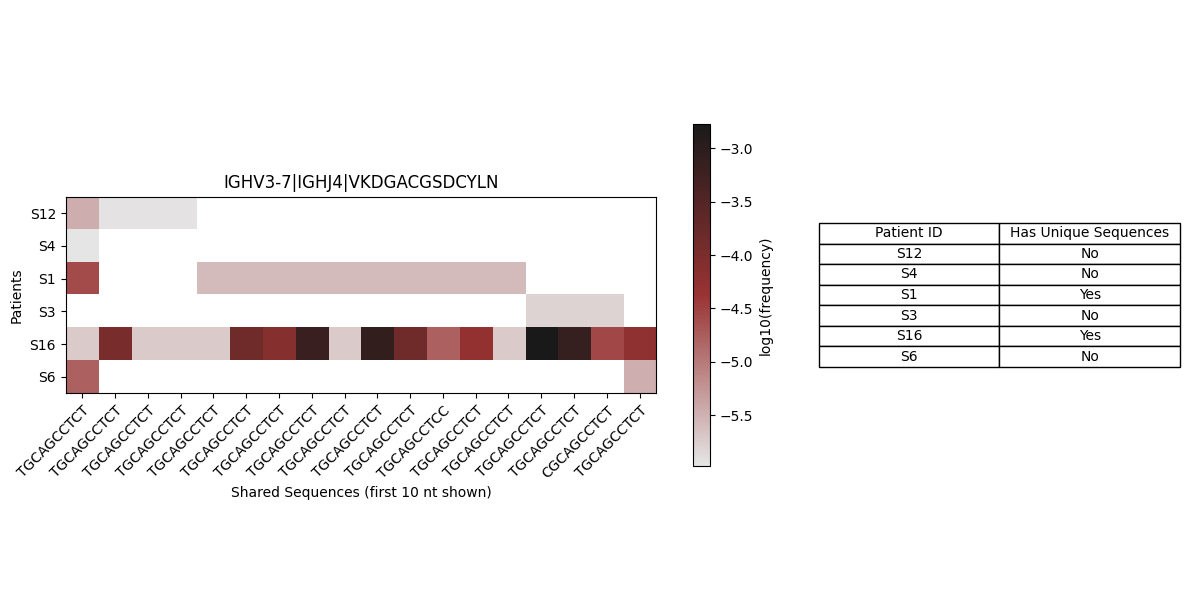

In [8]:
for i in range (92):
    temp = clone_marked.groupby('clonotype').get_group(clone_marked['clonotype'].unique()[1])
    shared_temp = temp[(temp['isShared'] == True)]
    if len(shared_temp) > 0:
        show_single_clonotype(shared_temp, temp)


In [3]:
S8 = pd.read_csv('../Data/new_sjogren_file/S8_add_d_gene.tsv', sep='\t')
cluster_S8 = cluster(S8)

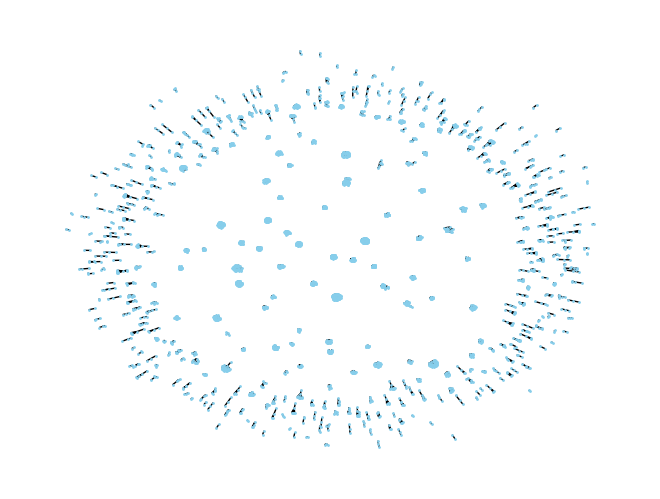

In [4]:
cluster_S8.draw_graph()

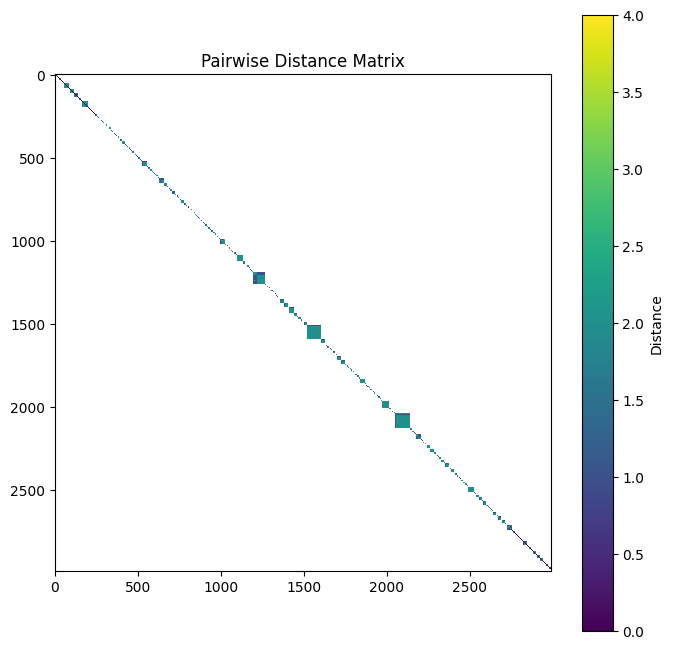

In [5]:
pairwise_distances = nx.floyd_warshall_numpy(cluster_S8.create_graph())
plt.figure(figsize=(8,8))
plt.imshow(pairwise_distances, cmap='viridis', interpolation='none')
plt.colorbar(label='Distance')
plt.title('Pairwise Distance Matrix')
plt.show()

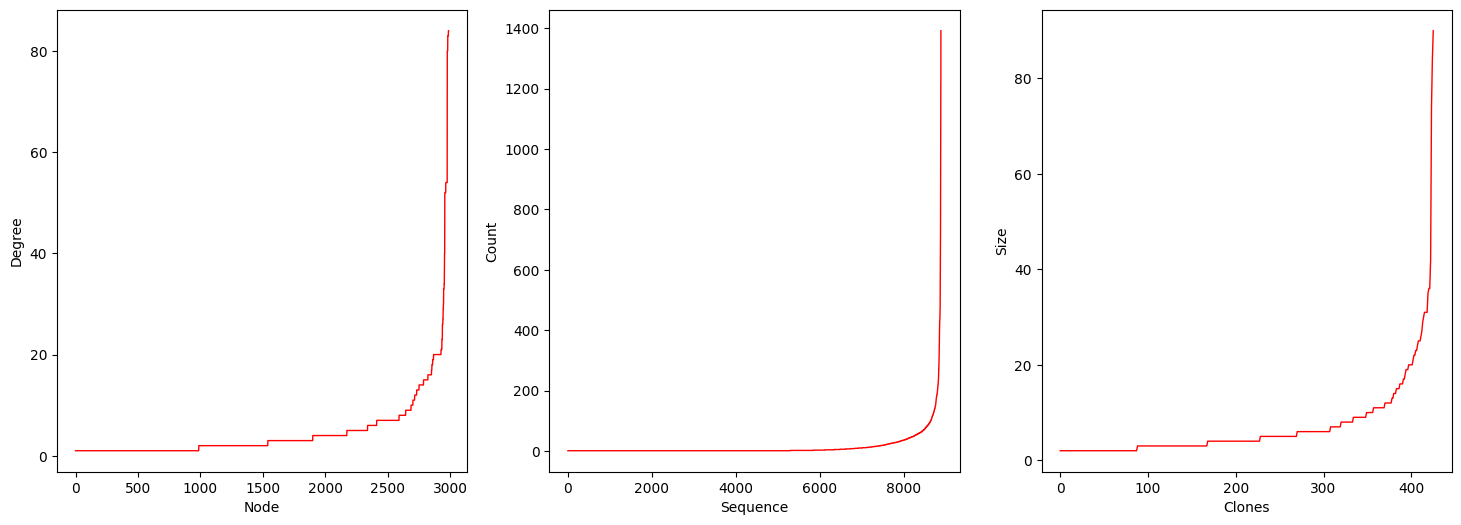

Clonal expansion index (sequence, gini) : 0.8209751982718654
Clonal expansion index (edge, gini) : 0.5625716562033685
Clonal diversification index (clones, shannon) : 8.091332972943007


In [5]:
# calculating clonal expansion index, in edges
edge_counts, gini_coefficient = cluster_S8.clonal_expansion_index_by_edges()
fig = plt.figure(figsize=(18,6))
axis1 = plt.subplot(1, 3, 1)
axis1.plot(edge_counts, 'r-', linewidth=1)
axis1.set_xlabel('Node')
axis1.set_ylabel('Degree')

# calculating clonal expansion index, in sequences
sequence_counts, gini_seq_coefficient = cluster_S8.clonal_expansion_index_by_duplicates()

axis2 = plt.subplot(1, 3, 2)
axis2.plot(sequence_counts, 'r-', linewidth=1)
axis2.set_xlabel('Sequence')
axis2.set_ylabel('Count')

# calculating clonal diversification index, in # of unique VDJ seqs in clones
cluster_size, shannon_entropy = cluster_S8.clonal_diversification_index()

axis3 = plt.subplot(1, 3, 3)
axis3.plot(cluster_size, 'r-', linewidth = 1)
axis3.set_xlabel('Clones')
axis3.set_ylabel('Size')

plt.show()

print(f'Clonal expansion index (sequence, gini) : {gini_seq_coefficient}')
print(f'Clonal expansion index (edge, gini) : {gini_coefficient}')
print(f'Clonal diversification index (clones, shannon) : {shannon_entropy}')

NameError: name 'v_call' is not defined

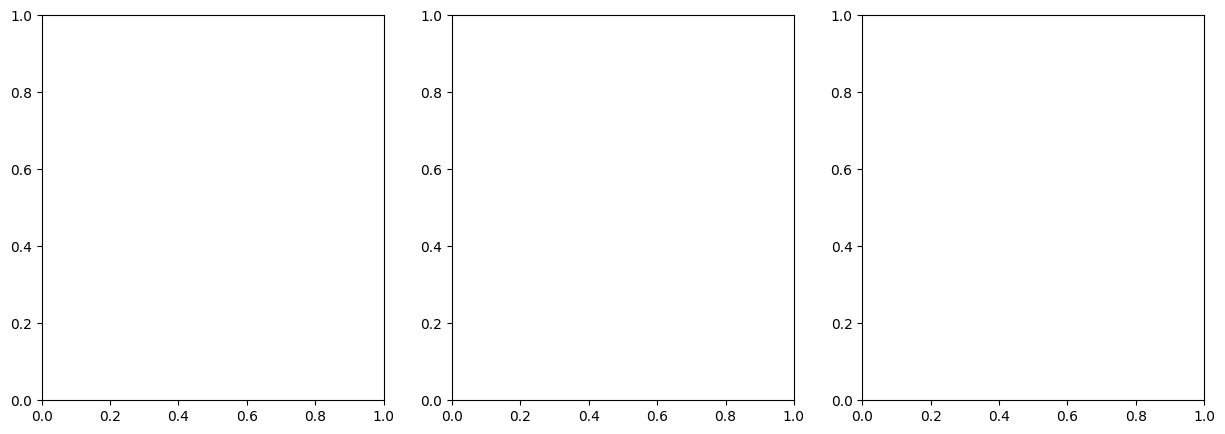

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(v_call.value_counts(), labels=v_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('V-Call')
axes[1].pie(j_call.value_counts(), labels=j_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('J-Call')
axes[2].pie(c_call.value_counts(), labels=c_call.value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('C-Call')

plt.tight_layout()
plt.savefig('../Data/Example/pie_chart.png', dpi=300)

In [39]:
sequence_length = df['sequence_alignment'].str.len()
sequence_length.hist(bins=100)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/sequence_length.png', dpi=300)
sequence_length.describe()

NameError: name 'df' is not defined

In [40]:
cdr3_length = df['cdr3_aa_len']
cdr3_length.hist(bins=100)
plt.title('CDR3 Length Distribution')
plt.xlabel('CDR3 Length')
plt.ylabel('Count')
plt.savefig('../Data/Example/cdr3_length.png', dpi=300)
cdr3_length.describe()

NameError: name 'df' is not defined

In [41]:
grouped_cluster_map = cluster(df)
map = grouped_cluster_map()

NameError: name 'df' is not defined

In [42]:
G = nx.Graph()

for i in range (len(map)):
    for seq, neighbors in map[i].items():
        G.add_node(seq)
        for neighbor in neighbors:
            G.add_edge(seq, neighbor)

TypeError: object of type 'type' has no len()

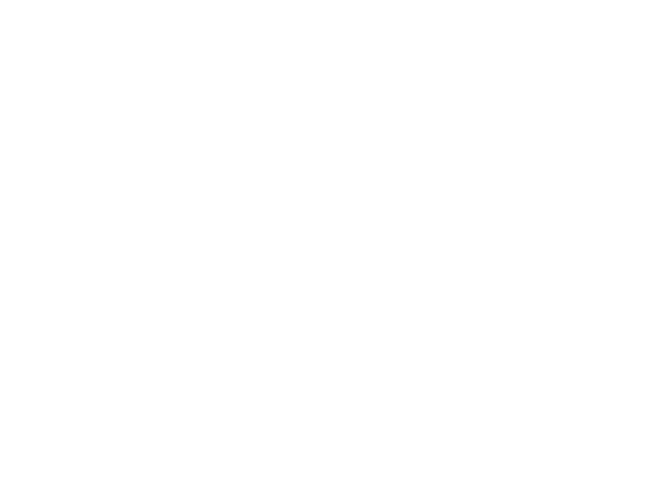

In [43]:
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels=False, node_size = 1, node_color = "skyblue", edge_color = 'black', font_size = 1)
plt.draw()
plt.savefig('../Data/Example/Cluster_Graph_without_label.png', dpi=1000)

In [44]:
recombination_types = recombinations(df)
CSRtypes = recombination_types()

NameError: name 'df' is not defined

In [45]:
types = []
freq = []

for t, f in CSRtypes.items():
    types.append(t)
    freq.append(f)

plt.figure(figsize = (10,10))
plt.pie(freq, labels = freq, startangle=90)
plt.legend(labels = types, loc = 'upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title('Class Switch Recombinations')
plt.savefig('../Data/Example/CSR_types.png', dpi=300)


NameError: name 'CSRtypes' is not defined